In [2]:
import sklearn
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/prateek/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/prateek/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score
import pickle

In [4]:
url='https://github.com/prateekmittal154/Movie-Review-Sentiment-Analysis/blob/main/IMDB-Dataset.csv?raw=true'

In [5]:
dataset= pd.read_csv('IMDB-Dataset.csv')
print(dataset.shape)
dataset.head()

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [7]:
dataset.sentiment.value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

In [8]:
dataset.sentiment.replace('positive', 1, inplace=True)
dataset.sentiment.replace('negative', 0, inplace=True)

In [9]:
def to_lower(text):
    return text.lower()

dataset.review = dataset.review.apply(to_lower)
dataset.review[0]


"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.<br /><br />the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.<br /><br />it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />i would say the main appeal of the show is due to the fa

In [10]:
def clean(text):
    cleaned = re.compile(r'<.*?>')
    return re.sub(cleaned,'',text)

dataset.review = dataset.review.apply(clean)
dataset.review[0]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes where other shows wo

In [11]:
def is_special(text):
    rem = ''
    for i in text:
        if i.isalnum():
            rem = rem + i
        else:
            rem = rem + ' '
    return rem

dataset.review = dataset.review.apply(is_special)
dataset.review[0]


'one of the other reviewers has mentioned that after watching just 1 oz episode you ll be hooked  they are right  as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence  which set in right from the word go  trust me  this is not a show for the faint hearted or timid  this show pulls no punches with regards to drugs  sex or violence  its is hardcore  in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary  it focuses mainly on emerald city  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  em city is home to many  aryans  muslims  gangstas  latinos  christians  italians  irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows wo

In [12]:
def rem_stopwords(text):

    stop_words = set(stopwords.words('english'))
    stop_words.remove('not')
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words]

dataset.review = dataset.review.apply(rem_stopwords)
dataset.review[0]

['one',
 'reviewers',
 'mentioned',
 'watching',
 '1',
 'oz',
 'episode',
 'hooked',
 'right',
 'exactly',
 'happened',
 'first',
 'thing',
 'struck',
 'oz',
 'brutality',
 'unflinching',
 'scenes',
 'violence',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'not',
 'show',
 'faint',
 'hearted',
 'timid',
 'show',
 'pulls',
 'punches',
 'regards',
 'drugs',
 'sex',
 'violence',
 'hardcore',
 'classic',
 'use',
 'word',
 'called',
 'oz',
 'nickname',
 'given',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'focuses',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cells',
 'glass',
 'fronts',
 'face',
 'inwards',
 'privacy',
 'not',
 'high',
 'agenda',
 'em',
 'city',
 'home',
 'many',
 'aryans',
 'muslims',
 'gangstas',
 'latinos',
 'christians',
 'italians',
 'irish',
 'scuffles',
 'death',
 'stares',
 'dodgy',
 'dealings',
 'shady',
 'agreements',
 'never',
 'far',
 'away',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'fact',
 'goes'

In [13]:
def generate_bigrams(x):
    n_grams = set(zip(*[x[i:] for i in range(2)]))
    for n_gram in n_grams:
        x.append(' '.join(n_gram))
    return x

dataset.review=dataset.review.apply(generate_bigrams)
dataset.review[0]

['one',
 'reviewers',
 'mentioned',
 'watching',
 '1',
 'oz',
 'episode',
 'hooked',
 'right',
 'exactly',
 'happened',
 'first',
 'thing',
 'struck',
 'oz',
 'brutality',
 'unflinching',
 'scenes',
 'violence',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'not',
 'show',
 'faint',
 'hearted',
 'timid',
 'show',
 'pulls',
 'punches',
 'regards',
 'drugs',
 'sex',
 'violence',
 'hardcore',
 'classic',
 'use',
 'word',
 'called',
 'oz',
 'nickname',
 'given',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'focuses',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cells',
 'glass',
 'fronts',
 'face',
 'inwards',
 'privacy',
 'not',
 'high',
 'agenda',
 'em',
 'city',
 'home',
 'many',
 'aryans',
 'muslims',
 'gangstas',
 'latinos',
 'christians',
 'italians',
 'irish',
 'scuffles',
 'death',
 'stares',
 'dodgy',
 'dealings',
 'shady',
 'agreements',
 'never',
 'far',
 'away',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'fact',
 'goes'

In [14]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/prateek/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
dataset.head()

,review,sentiment
0,one reviewer mentioned watching 1 oz episode h...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically family little boy jake think zombie ...,0
4,petter mattei love time money visually stunnin...,1


In [33]:
# sample 5% of data to be used as unseen data

data = dataset.sample(frac=0.98, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)


# print the revised shape
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))


Data for Modeling: (49000, 2)
Unseen Data For Predictions: (1000, 2)


In [34]:
X = np.array(data.iloc[:,0].values)
y = np.array(data.sentiment.values)
cv = CountVectorizer(max_features=1200)
X = cv.fit_transform(data.review).toarray()
print("X.shape = ",X.shape)
print("y.shape = ",y.shape)

X.shape =  (49000, 1200)
y.shape =  (49000,)


In [35]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()

X = tfidfconverter.fit_transform(X).toarray()

In [36]:
trainx = X
trainy = y

print("Train shapes : trainx = {}, trainy = {}".format(trainx.shape,trainy.shape))

Train shapes : trainx = (49000, 1200), trainy = (49000,)


In [41]:
X1= np.array(data_unseen.iloc[:,0].values)
y1 = np.array(data_unseen.sentiment.values)
cv= CountVectorizer(max_features=1200)
X1=cv.fit_transform(data_unseen.review).toarray()
print("X1.shape= ", X1.shape)
print("y1.shape= ", y1.shape)

X1.shape=  (1000, 1200)
y1.shape=  (1000,)


In [42]:
testx = X1
testy = y1

print("Test shapes : testx = {}, testy = {}".format(testx.shape,testy.shape))

Test shapes : testx = (1000, 1200), testy = (1000,)


In [43]:
gnb = GaussianNB()
gnb.fit(trainx, trainy)

GaussianNB()

In [44]:
ypg = gnb.predict(testx)


print("Gaussian = ", accuracy_score(testy,ypg))


Gaussian =  0.529


In [45]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(testy,ypg)

print(cm)

[[338 167]
 [304 191]]


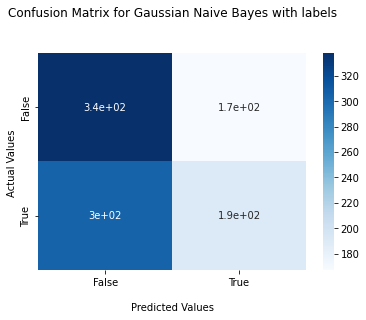

In [47]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix for Gaussian Naive Bayes with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [48]:
mnb= MultinomialNB(alpha=1.0,fit_prior=True)
mnb.fit(trainx, trainy)

ypm= mnb.predict(testx)

print("Multinomial = ", accuracy_score(testy, ypm))

Multinomial =  0.537


In [49]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(testy,ypm)

print(cm1)

[[353 152]
 [311 184]]


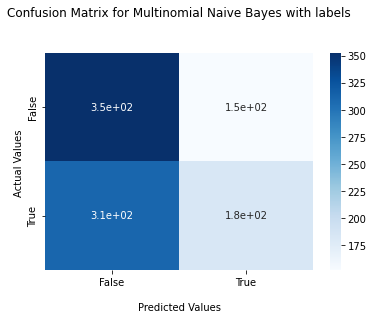

In [50]:

ax = sns.heatmap(cm1, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix for Multinomial Naive Bayes with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [51]:
bnb= BernoulliNB(alpha=1.0,fit_prior=True)
bnb.fit(trainx, trainy)

BernoulliNB()

In [52]:
ypb= bnb.predict(testx)

print("Bernoulli = ", accuracy_score(testy, ypb))

Bernoulli =  0.544


In [53]:
from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(testy,ypb)

print(cm2)

[[292 213]
 [243 252]]


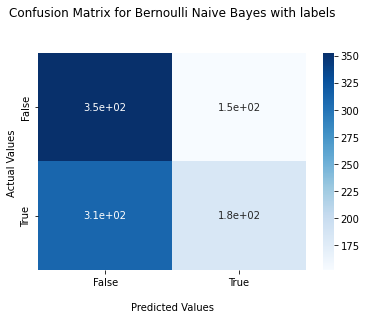

In [54]:
import seaborn as sns
ax = sns.heatmap(cm1, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix for Bernoulli Naive Bayes with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=987)
cross_val_score(dtc, trainx, trainy, cv=10)

array([0.71795918, 0.71142857, 0.7022449 , 0.71612245, 0.70959184,
       0.71      , 0.71102041, 0.71326531, 0.72612245, 0.72387755])

In [56]:
dtc.fit(trainx,trainy)

DecisionTreeClassifier(random_state=987)

In [57]:
ypdt= bnb.predict(testx)

print("Decision Tree Classifier = ", accuracy_score(testy, ypdt))

Decision Tree Classifier =  0.544


In [ ]:
pickle.dump(bnb,open('model1.pkl','wb'))

In [ ]:
rev =  input()
f1 = clean(rev)
f2 = is_special(f1)
f3 = to_lower(f2)
f4 = rem_stopwords(f3)
f5 = generate_bigrams(f4)
f6 = lemmatize(f5)

bow,words = [],word_tokenize(f6)
for word in words:
    bow.append(words.count(word))
#np.array(bow).reshape(1,3000)
#bow.shape
word_dict = cv.vocabulary_
pickle.dump(word_dict,open('bow.pkl','wb'))

In [ ]:
inp = []
for i in word_dict:
    inp.append(f5.count(i[0]))
y_pred = bnb.predict(np.array(inp).reshape(1,1000))

In [ ]:
print(y_pred)